<a href="https://colab.research.google.com/github/Safirap/Project/blob/main/Prediksi_Pergerakan_Saham_UNVR_JK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.Import Library

In [1]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

#2.Import Data

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/Safirap/Data/main/UNVR.JK.csv',sep=',')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-15,9765.0,9960.0,9760.0,9960.0,9150.414063,11469500
1,2019-01-16,9960.0,9970.0,9565.0,9585.0,8805.895508,17816500
2,2019-01-17,9660.0,9800.0,9660.0,9775.0,8980.451172,8912500
3,2019-01-18,9730.0,9785.0,9605.0,9785.0,8989.637695,10810000
4,2019-01-21,9795.0,9820.0,9725.0,9750.0,8957.482422,6446500
...,...,...,...,...,...,...,...
742,2022-01-10,4220.0,4290.0,4200.0,4250.0,4250.000000,12806600
743,2022-01-11,4260.0,4270.0,4150.0,4180.0,4180.000000,17846600
744,2022-01-12,4200.0,4340.0,4180.0,4330.0,4330.000000,29769500
745,2022-01-13,4330.0,4340.0,4240.0,4270.0,4270.000000,13806300


#3.Data Prepocessing

In [3]:
data.shape

(747, 7)

terdapat 747 baris dan 7 kolom

In [4]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

Seleksi Kolom

In [5]:
data2 = data[['Date', 'Adj Close']]
data2[:10]

,Date,Adj Close
0,2019-01-15,9150.414063
1,2019-01-16,8805.895508
2,2019-01-17,8980.451172
3,2019-01-18,8989.637695
4,2019-01-21,8957.482422
5,2019-01-22,9012.605469
6,2019-01-23,8994.231445
7,2019-01-24,9017.199219
8,2019-01-25,9012.605469
9,2019-01-28,8778.333008


Visualisasi pergerakan saham UNVR.JK

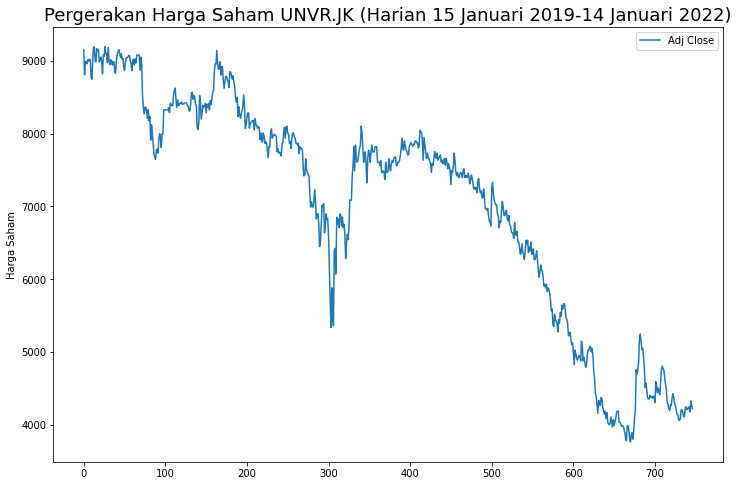

In [6]:
data2.plot(figsize = (12,8))
plt.title('Pergerakan Harga Saham UNVR.JK (Harian 15 Januari 2019-14 Januari 2022)', fontsize = 18)
plt.ylabel('Harga Saham')
plt.show()

dari grafik diatas terlihat bahwa harga saham mengalami penurunan

#4.Pemodelan Pergerakan saham menggunakan Simulasi Monte Carlo

##4.1.Menghitung return harian

In [7]:
return_daily = data2['Adj Close'].pct_change().dropna()
return_daily.head(10)

1    -0.037651
2     0.019823
3     0.001023
4    -0.003577
5     0.006154
6    -0.002039
7     0.002554
8    -0.000509
9    -0.025994
10   -0.003663
Name: Adj Close, dtype: float64

Visualisasi return harian

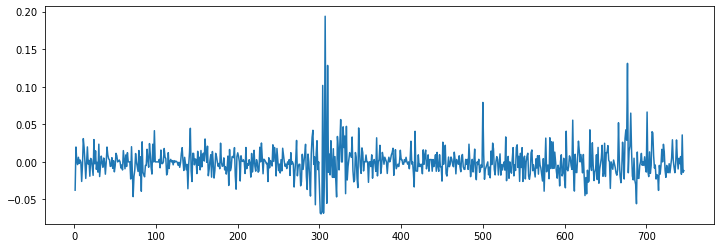

In [8]:
return_daily.plot(figsize = (12,4))
plt.show()

##4.2.Menghitung Drift


Drift merupakan perkalian antara rata-rata return harian saham UNVR.JK dan dikurangi dengan variance yang dikali 0.5, pada python untuk mencari mean dari rata-rata return harian adalah dengan menambahkan “.mean()” pada variabel return harian.

Mencari mean

In [9]:
u = return_daily.mean()
u

-0.0008340678194499988

Mencari Variansi

In [10]:
var = return_daily.var()
var

0.0004161743543672309

Menghitung Drift

In [11]:
drift = u - (0.5 * var)
drift

-0.0010421549966336142

##4.3.Menghitung Komponen Random 


Random Componen merupakan hasil perkalian dari standart deviasi dengan Z, standart deviasi adalah akar kuadrat dari variance, dikarenakan nilai variance sudah didapat dari perhitungan Drift

Menghitung standar Deviasi

In [12]:
stdev = return_daily.std()
stdev

0.020400351819692495

In [13]:
t_interval = 1095
iteration = 5

In [14]:
norm.ppf(np.random.rand(t_interval,iteration))

array([[-1.22500608,  0.28437073,  0.81064041, -0.51057367,  1.09279221],
       [-0.40333253,  0.76062439, -0.54792369, -0.18264909,  0.40556571],
       [ 0.89921318,  2.25096975, -1.60063983,  1.97560999, -0.0467229 ],
       ...,
       [-0.14697575,  0.12237758,  0.38905769, -0.91946928,  0.93347286],
       [ 0.28395852,  0.16457226,  1.03857623,  0.37183723,  1.7109794 ],
       [ 0.26790602,  0.44690885, -0.61788641,  0.38165734, -1.14313711]])

##4.4.Menghitung Pergerakan Harian e^r

e merupakan bilangan euler (2,718281828) dan r merupakan penjumlahan dari Drift dan Random Component


In [15]:
return_daily_e = np.exp(drift + stdev * norm.ppf(np.random.rand(t_interval,iteration)))
return_daily_e

array([[1.00862586, 0.97251231, 0.97717218, 1.03355894, 1.02820712],
       [1.03935448, 0.99174753, 0.97326886, 1.00325881, 1.00569479],
       [0.96589303, 1.01858567, 1.02209928, 0.99919458, 0.97250943],
       ...,
       [1.00689645, 1.01055773, 0.98655177, 1.00520668, 1.02103092],
       [0.98912118, 1.02016763, 1.00635942, 0.99892956, 1.02990907],
       [1.00061484, 1.02046812, 0.98408015, 0.9759452 , 0.97311923]])

##4.5.Menghitung harga saham

In [20]:
S0 = data2['Adj Close'].iloc[-1]
S0

4220.0

In [16]:
price_list = np.zeros_like(return_daily_e)
price_list

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [21]:
price_list[0] = S0
price_list

array([[4220., 4220., 4220., 4220., 4220.],
       [   0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.],
       ...,
       [   0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.]])

In [22]:
for t in range(1, t_interval):
    price_list[t] = price_list[t - 1] * return_daily_e[t]

In [23]:
price_list

array([[4220.        , 4220.        , 4220.        , 4220.        ,
        4220.        ],
       [4386.07590059, 4185.17455691, 4107.19458659, 4233.75218418,
        4244.03200386],
       [4236.4801461 , 4262.95881086, 4197.96064175, 4230.34221749,
        4127.36115868],
       ...,
       [ 502.77583266, 1121.59997713, 2524.1769049 , 3907.46936955,
        1146.85294571],
       [ 497.30622266, 1144.21999069, 2540.22919708, 3903.28664277,
        1181.15425016],
       [ 497.61198733, 1167.64002281, 2499.78912463, 3809.39385753,
        1149.40391602]])

##4.6.Visualisasi Pergerakan Saham

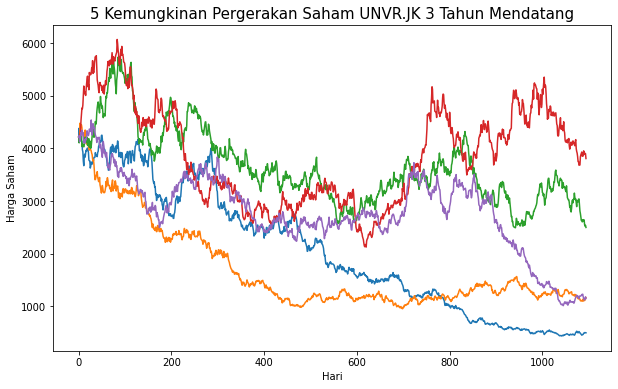

In [24]:
plt.figure(figsize=(10,6))
plt.plot(price_list)
plt.title("5 Kemungkinan Pergerakan Saham UNVR.JK 3 Tahun Mendatang", fontsize = 15)
plt.ylabel("Harga Saham", fontsize = 10)
plt.xlabel("Hari", fontsize = 10)
plt.show()